# Keras 实战 DNN

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print('tf    version: {}'.format(tf.__version__) )
print('keras version: {}'.format(keras.__version__) )

tf    version: 1.14.0
keras version: 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)

x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


### tf.keras.Sequential
  堆叠layer

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
             optimizer = keras.optimizers.SGD(0.001),
             metrics=['accuracy'])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
%%time
logdir = './dataset/'
if not os.path.exists(logdir):
    os.mkdir(logdir)
    
output_model_file = os.path.join(logdir, 
            "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir), 
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True), 
    keras.callbacks.EarlyStopping(
                                 min_delta=1e-3, 
                                 patience=3)
]

history = model.fit(x_train_scaled, y_train, epochs=40, 
         validation_data=(x_valid_scaled,y_valid), 
                   callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 43s 791us/sample - loss: 2.0535 - acc: 0.3147 - val_loss: 1.1469 - val_acc: 0.6156
Epoch 2/40
55000/55000 [==============================] - 39s 708us/sample - loss: 1.1661 - acc: 0.5931 - val_loss: 0.8217 - val_acc: 0.6998
Epoch 3/40
55000/55000 [==============================] - 39s 708us/sample - loss: 0.9948 - acc: 0.6466 - val_loss: 0.7275 - val_acc: 0.7310
Epoch 4/40
55000/55000 [==============================] - 39s 712us/sample - loss: 0.9115 - acc: 0.6739 - val_loss: 0.6652 - val_acc: 0.7610
Epoch 5/40
55000/55000 [==============================] - 39s 709us/sample - loss: 0.8573 - acc: 0.6945 - val_loss: 0.6258 - val_acc: 0.7702
Epoch 6/40
55000/55000 [==============================] - 39s 711us/sample - loss: 0.8143 - acc: 0.7074 - val_loss: 0.5896 - val_acc: 0.7868
Epoch 7/40
55000/55000 [==============================] - 39s 707us/sample - loss: 0.7760 - acc: 0.7209 -

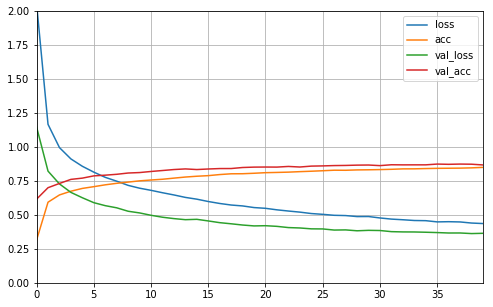

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
    
plot_learning_curves(history)

In [7]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.4601 - acc: 0.8431


[0.46007471067905426, 0.8431]